In [1]:
#pip install apyori

In [14]:
from apyori import apriori
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\anura\Desktop\d\Market_Basket_Optimisation.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#missing values 
print(df.isnull().sum())

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64


In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
# Remove duplicate transactions
#df.drop_duplicates(inplace=True)

In [19]:
trans =[]
for i in range(0, 7501):
    trans.append([str(df.values[i, j]) for j in range(0,20)])
trans
type(trans)

list

In [20]:
trans[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [21]:
trans[7500]

['eggs',
 'frozen smoothie',
 'yogurt cake',
 'low fat yogurt',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [22]:
#Training the apriori model on the dataset 
from apyori import apriori

rules =apriori(transactions =trans,
               min_support     =0.003,
               min_confidence  =0.2,
               min_lift        =3,
               min_length      =2,
               max_length      =2)
rules

<generator object apriori at 0x00000216DD776F80>

In [23]:
reports =list(rules)
reports

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [24]:
len(reports)

9

In [25]:
reports[0]

RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])

In [26]:
reports[0][1]  #support

0.004532728969470737

In [27]:
reports[0][2][0][0]  #Base item

frozenset({'light cream'})

In [28]:
reports[0][2][0][1]  #add items

frozenset({'chicken'})

In [29]:
reports[0][2][0][2]   #confidence

0.29059829059829057

In [30]:
reports[0][2][0][3]   #lift

4.84395061728395

In [31]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ----------------------- ---------------- 0.8/1.4 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


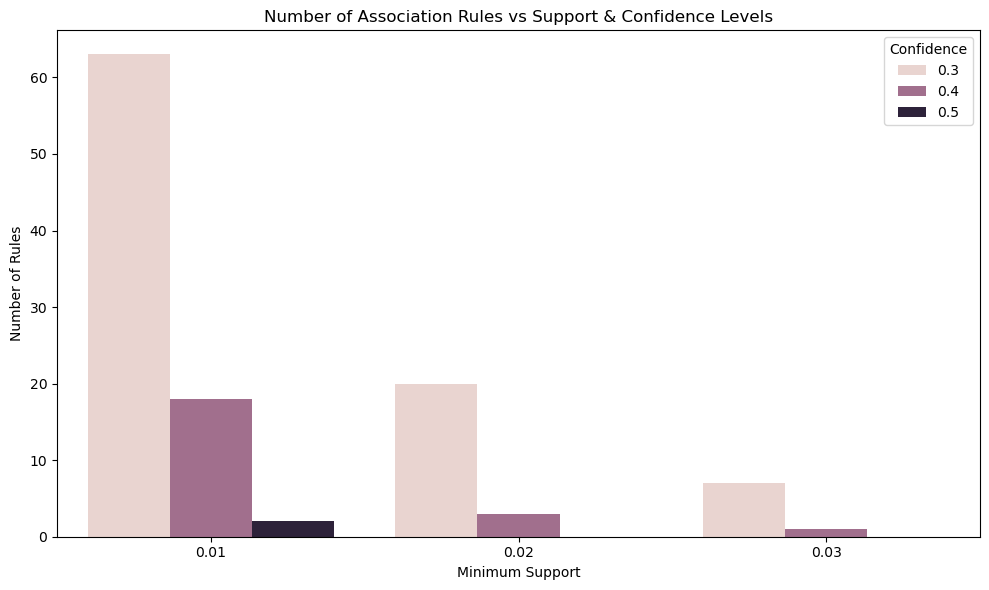

,support,confidence,num_rules
0,0.01,0.3,63
1,0.01,0.4,18
2,0.01,0.5,2
3,0.02,0.3,20
4,0.02,0.4,3
5,0.02,0.5,0
6,0.03,0.3,7
7,0.03,0.4,1
8,0.03,0.5,0


In [32]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare transaction data
transactions = []
for i in range(0, 7501):
    transactions.append([str(df.values[i, j]) for j in range(0, 20) if str(df.values[i, j]) != 'nan'])

# Encode transactions into one-hot format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Define different values for support and confidence
support_values = [0.01, 0.02, 0.03]
confidence_values = [0.3, 0.4, 0.5]

# Store results for visualization
results = []

# Loop over support and confidence combinations
for support in support_values:
    frequent_itemsets = apriori(df_encoded, min_support=support, use_colnames=True)
    for confidence in confidence_values:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        results.append({
            'support': support,
            'confidence': confidence,
            'num_rules': len(rules)
        })

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='num_rules', hue='confidence', data=results_df)
plt.title('Number of Association Rules vs Support & Confidence Levels')
plt.ylabel('Number of Rules')
plt.xlabel('Minimum Support')
plt.legend(title='Confidence')
plt.tight_layout()
plt.show()

results_df


### Analysis and Interpretation:

In [33]:
a =[]
b =[]
c =[]
d =[]
e =[]

In [34]:
for i in range(0, 9):
    a.append(reports[i][2][0][0])    #Base items
    b.append(reports[i][2][0][1])    #add items
    c.append(reports[i][1])          #supports
    d.append(reports[i][2][0][2])    #confidence 
    e.append(reports[i][2][0][3])    #lift

In [35]:
Base     =pd.DataFrame(a)
add      =pd.DataFrame(b)
support  =pd.DataFrame(c)
conf     =pd.DataFrame(d)
lift     =pd.DataFrame(e)

In [36]:
df_new =pd.concat([Base, add, support, conf, lift], axis =1)
df_new.columns  =['Base', 'add', 'support', 'conf', 'lift']
df_new

,Base,add,support,conf,lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


### Interview Questions:

In [37]:
#1.What is lift and why is it important in Association rules?
print('''
Lift is a measure used in association rule mining (e.g., in market basket analysis) to evaluate the strength and usefulness of a rule.

Formula:
Lift(𝐴→𝐵)=𝑃(𝐴∩𝐵)/𝑃(𝐴)×𝑃(𝐵)=Confidence(𝐴→𝐵)/Support(𝐵)
Where:
-->P(A∩B): Probability of both A and B occurring together.
-->P(A): Probability of A.
-->P(B): Probability of B.
    
Interpretation:
Lift = 1: A and B are independent (no association).

Lift > 1: A and B are positively correlated (B is more likely to occur with A).

Lift < 1: A and B are negatively correlated (B is less likely to occur with A).

Why is Lift Important?
Detects True Associations:
Unlike support and confidence, lift considers the baseline frequency of the consequent (B), helping identify rules that are not just due to high frequency.

Filters Spurious Rules:
High confidence may occur simply because the consequent is common. Lift corrects for this and helps focus on meaningful associations.

Business Insights:
A high lift value implies a strong actionable relationship (e.g., “if a customer buys bread, they are 3x more likely to buy butter”).
''')


Lift is a measure used in association rule mining (e.g., in market basket analysis) to evaluate the strength and usefulness of a rule.

Formula:
Lift(𝐴→𝐵)=𝑃(𝐴∩𝐵)/𝑃(𝐴)×𝑃(𝐵)=Confidence(𝐴→𝐵)/Support(𝐵)
Where:
-->P(A∩B): Probability of both A and B occurring together.
-->P(A): Probability of A.
-->P(B): Probability of B.
    
Interpretation:
Lift = 1: A and B are independent (no association).

Lift > 1: A and B are positively correlated (B is more likely to occur with A).

Lift < 1: A and B are negatively correlated (B is less likely to occur with A).

Why is Lift Important?
Detects True Associations:
Unlike support and confidence, lift considers the baseline frequency of the consequent (B), helping identify rules that are not just due to high frequency.

Filters Spurious Rules:
High confidence may occur simply because the consequent is common. Lift corrects for this and helps focus on meaningful associations.

Business Insights:
A high lift value implies a strong actionable relationship 

In [38]:
#2.What is support and Confidence. How do you calculate them?
print('''
Support and Confidence are key metrics used in association rule mining (e.g., Apriori algorithm) to evaluate the relevance and reliability of discovered rules.

1. Support
Definition:
Support indicates how frequently an itemset appears in the dataset.

Formula:

     Support(𝐴)=Number of transactions containing A/Total number of transactions
For a rule A→B:

Support(𝐴→𝐵)=Number of transactions containing both A and B/Total number of transactions

Purpose:
Helps identify how common a rule is. Rules with very low support may be unreliable.

2. Confidence
Definition:
Confidence indicates how often the rule has been found to be true.

Formula:
    Confidence(A→B)= Support(A)/Support(A∪B) =P(B∣A)

Purpose:
Measures the likelihood that item B is purchased when item A is purchased.
''')


Support and Confidence are key metrics used in association rule mining (e.g., Apriori algorithm) to evaluate the relevance and reliability of discovered rules.

1. Support
Definition:
Support indicates how frequently an itemset appears in the dataset.

Formula:

     Support(𝐴)=Number of transactions containing A/Total number of transactions
For a rule A→B:

Support(𝐴→𝐵)=Number of transactions containing both A and B/Total number of transactions

Purpose:
Helps identify how common a rule is. Rules with very low support may be unreliable.

2. Confidence
Definition:
Confidence indicates how often the rule has been found to be true.

Formula:
    Confidence(A→B)= Support(A)/Support(A∪B) =P(B∣A)

Purpose:
Measures the likelihood that item B is purchased when item A is purchased.



In [39]:
#3.What are some limitations or challenges of Association rules mining?
print('''
1.Large Number of Rules:
    Can generate too many rules, especially with low support/confidence thresholds.
    Many rules may be trivial, redundant, or uninteresting.

2.Scalability:
    Mining association rules in large datasets is computationally expensive.
    Requires multiple scans of the database (especially in algorithms like Apriori).

3.Lack of Causality:
    Association rules show correlation, not causation.
    Just because items A and B are frequently bought together doesn't mean A causes B to be bought.

4.Handling Rare Items:
    Items with low frequency may be ignored due to low support, even if they form interesting or high-value patterns.

5.Difficulty in Setting Thresholds:

    Choosing appropriate minimum support and confidence values is non-trivial.

    Too high: miss interesting rules; too low: generate noise.

6.Item Independence Assumption:

    Many algorithms assume that items occur independently, which might not reflect real-world dependencies.

7.Interpretability:

    Interpreting and selecting useful rules from hundreds or thousands can be challenging without domain knowledge.

8.Imbalanced Data:

    In datasets with skewed distribution (e.g., 95% of transactions are one type), rules can be biased toward frequent items.
''')


1.Large Number of Rules:
    Can generate too many rules, especially with low support/confidence thresholds.
    Many rules may be trivial, redundant, or uninteresting.

2.Scalability:
    Mining association rules in large datasets is computationally expensive.
    Requires multiple scans of the database (especially in algorithms like Apriori).

3.Lack of Causality:
    Association rules show correlation, not causation.
    Just because items A and B are frequently bought together doesn't mean A causes B to be bought.

4.Handling Rare Items:
    Items with low frequency may be ignored due to low support, even if they form interesting or high-value patterns.

5.Difficulty in Setting Thresholds:

    Choosing appropriate minimum support and confidence values is non-trivial.

    Too high: miss interesting rules; too low: generate noise.

6.Item Independence Assumption:

    Many algorithms assume that items occur independently, which might not reflect real-world dependencies.

7.Interpr